In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_manager as dm

sns.set(style="darkgrid", font_scale=1.4)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = dm.load_dataframe("sigma_extraction_contest.csv")

In [4]:
df.head()

,method_name,phantom_porosity,phantom_sigma,calculated_sigma,deviation_percent,processing_time_seconds
0,anvar,0.2,10.0,8.693562,13.064375,3.318899
1,grimax,0.2,10.0,8.485281,15.147186,0.091878
2,anvar,0.2,12.5,10.966564,12.267485,3.384534
3,grimax,0.2,12.5,14.142136,13.137085,0.055938
4,anvar,0.2,15.0,13.426780,10.488137,3.313093


In [5]:
# df.loc[df.method_name=="anvar", "calculated_sigma"] = df[df.method_name=="anvar"].calculated_sigma / 1.6
# df.head()

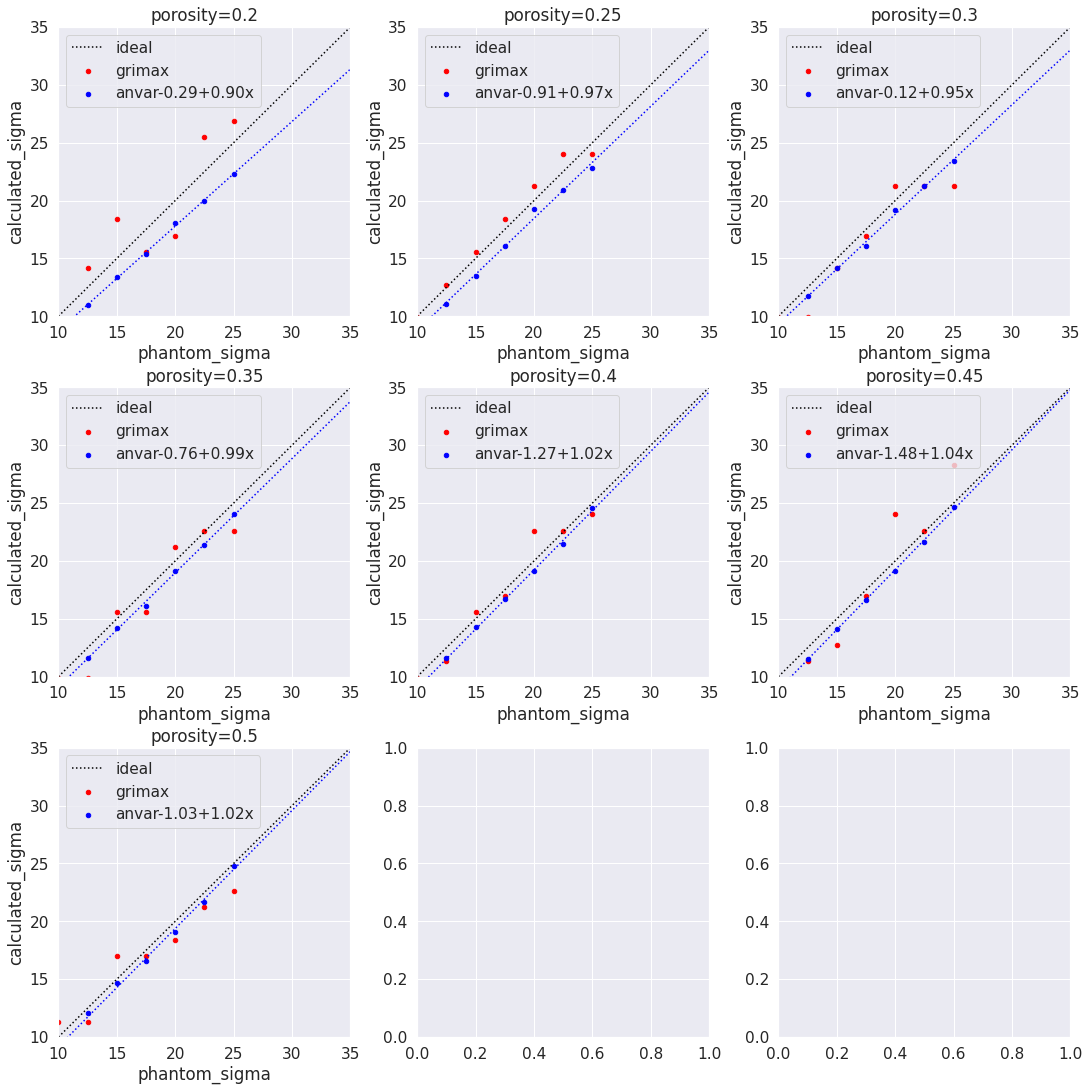

In [8]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "anvar"], ["red", "blue"]):
        #polyfit
        equation = ""
        if method == "anvar":
            x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
            y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
            fit = np.polyfit(x, y, 1)
            x_new = np.linspace(10, 35)
            ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
            equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label=method+equation,
                                                           color=c)
        ax.set_title(f"porosity={p}")
        ax.set_ylim(10, 35)
        ax.set_xlim(10, 35)
    
    x = np.linspace(10, 35)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


# Precision

In [10]:
df.groupby("method_name").get_group("anvar").deviation_percent.mean()

6.864641005480219

In [11]:
df.groupby("method_name").get_group("grimax").deviation_percent.mean()

8.36452533408738

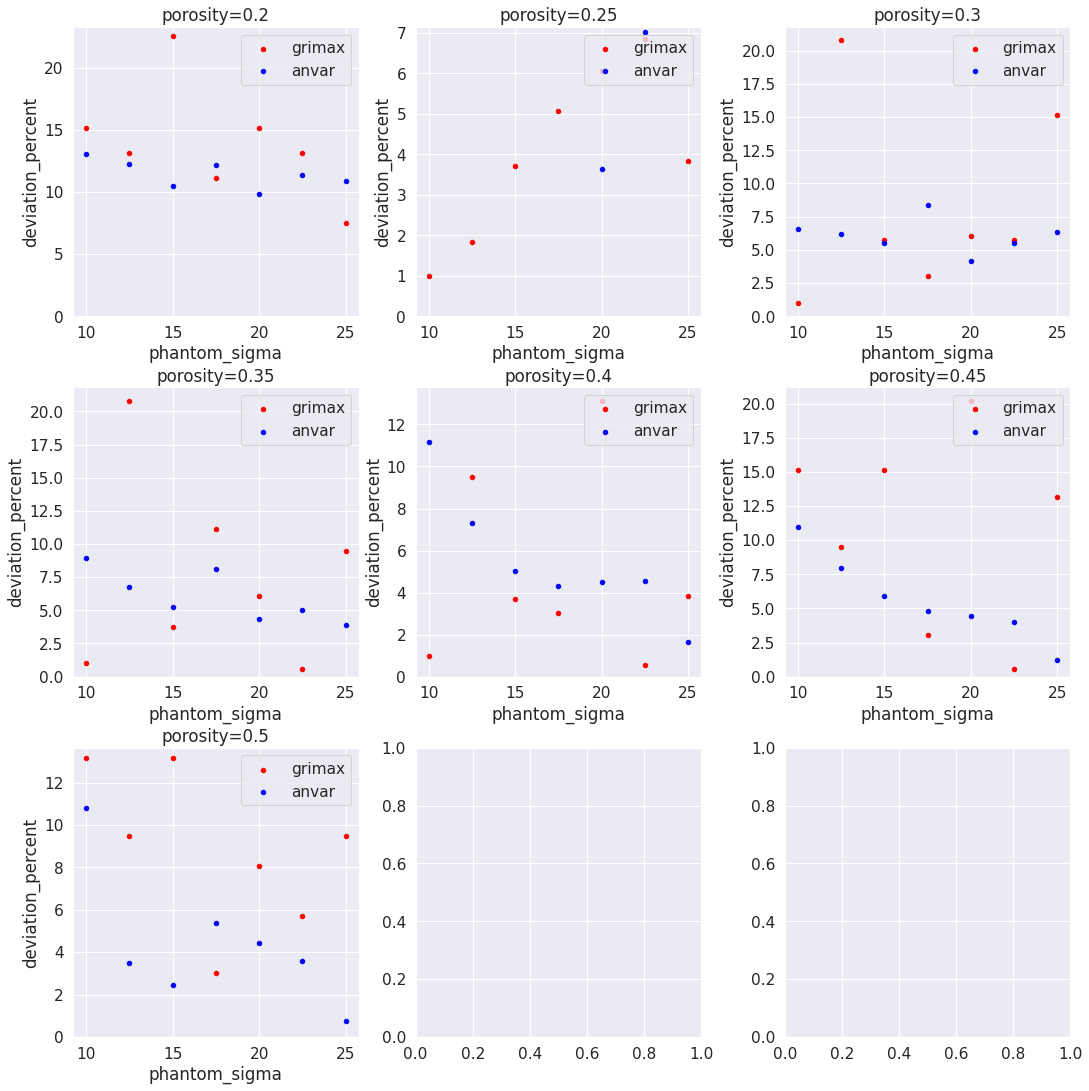

In [11]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "anvar"], ["red", "blue"]):
        #polyfit
        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="deviation_percent",
                                                           ax=ax,
                                                           label=method,
                                                           color=c)
        ax.set_title(f"porosity={p}")
        ax.set_ylim(ymin=0)

    ax.legend(loc=1)
